# Wine Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

Source of Dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Data Loading, Checking and Cleaning

In [2]:
from sklearn import datasets
df = pd.read_csv('winequality-red.csv')
df.tail()    #df.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
# check for null values and object datatypes
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Exploration and Visualisation

In [4]:
# Observe the correlation between target variable 'quality' and features
corr = df.corr()['quality'].sort_values(ascending=False)

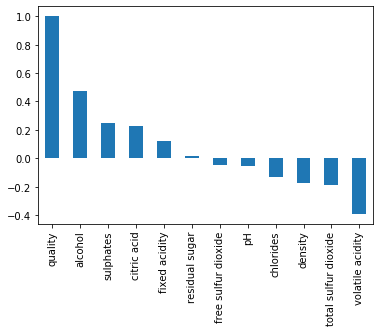

In [5]:
corr.plot(kind='bar')

Text(0.5, 1, 'Correlations between Features in Percentages')

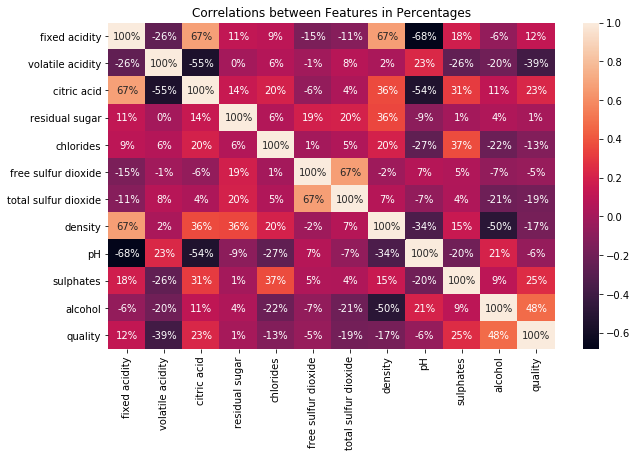

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.title('Correlations between Features in Percentages')

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
df['quality'].value_counts(bins=2)

(5.5, 8.0]      855
(2.994, 5.5]    744
Name: quality, dtype: int64

Select features where there is a minimum threshold of correlation of value of 0.2 as these are the ones that will give us more information.

In [9]:
corr[abs(corr) > 0.2]

quality             1.000000
alcohol             0.476166
sulphates           0.251397
citric acid         0.226373
volatile acidity   -0.390558
Name: quality, dtype: float64

In [10]:
print(abs(corr) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


Text(0.5, 1.0, 'Alcohol Content in Wines by Quality')

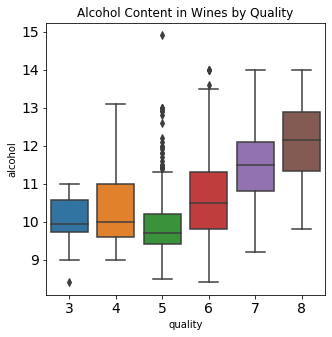

In [11]:
plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y='alcohol', data=df)

plt.xlabel('quality')
plt.ylabel('alcohol')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.title('Alcohol Content in Wines by Quality')

In [12]:
# Observe mid-quality wines -- slight anomalies

df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

In [13]:
corr_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(corr_subset)

quality                 1.000000
alcohol                 0.375224
sulphates               0.162405
citric acid             0.080146
fixed acidity           0.053447
pH                      0.043065
residual sugar         -0.018452
free sulfur dioxide    -0.060618
chlorides              -0.081813
density                -0.134559
volatile acidity       -0.237193
total sulfur dioxide   -0.239067
Name: quality, dtype: float64


Text(0.5, 1.0, 'Sulphates in Wines by Quality')

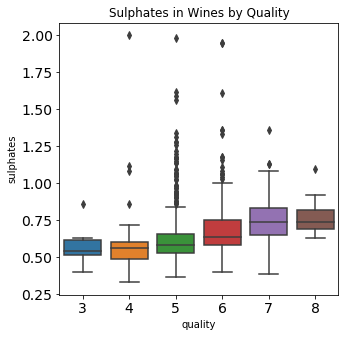

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y='sulphates', data=df)

plt.xlabel('quality')
plt.ylabel('sulphates')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.title('Sulphates in Wines by Quality')

Text(0.5, 1.0, 'Citric Acid in Wines by Quality')

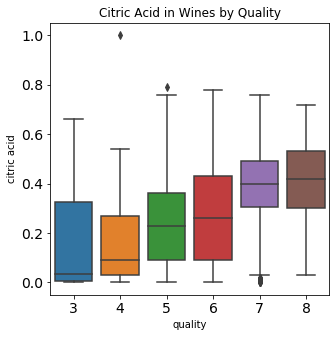

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y='citric acid', data=df)

plt.xlabel('quality')
plt.ylabel('citric acid')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.title('Citric Acid in Wines by Quality')

Text(0.5, 1.0, 'Volatile Acidity in Wines by Quality')

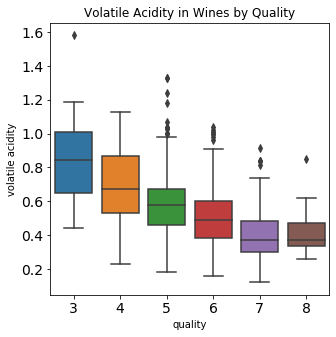

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y='volatile acidity', data=df)

plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.title('Volatile Acidity in Wines by Quality')

Text(0.5, 1.0, 'Total Sulphur Dioxide in Wines by Quality')

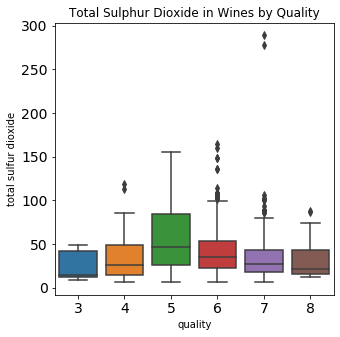

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y='total sulfur dioxide', data=df)

plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.title('Total Sulphur Dioxide in Wines by Quality')

### PCA Coefficient Matrix

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# np.arange(start, stop, step) --> stops before the stop value is reached
for i in np.arange(1, 12, 1):
    y = df.loc[:, 'quality'].values
    x = StandardScaler().fit_transform(df.iloc[:, 0:-1])

    pca = PCA(n_components = i)
    pc = pca.fit_transform(x)
    print('i = ', i, ':', pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.sum(), '\n')
  
pca = PCA().fit(x)
pd.DataFrame(pca.components_, columns=[df.iloc[:, 0:-1]], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])

i =  1 : [0.28173931]
0.28173931278817294 

i =  2 : [0.28173931 0.1750827 ]
0.4568220118429414 

i =  3 : [0.28173931 0.1750827  0.1409585 ]
0.5977805108224625 

i =  4 : [0.28173931 0.1750827  0.1409585  0.11029387]
0.7080743772386746 

i =  5 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837]
0.7952827473610352 

i =  6 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439]
0.8552471350764365 

i =  7 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193]
0.9083190640939521 

i =  8 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061]
0.9467696731537691 

i =  9 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311 ]
0.9781007746827459 

i =  10 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483]
0.9945856080071009 

i =  11 : [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.0

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
PC2,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
PC3,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
PC4,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
PC5,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
PC6,0.101479,0.411449,0.069593,0.049156,0.304339,-0.014000,0.136308,-0.391152,-0.522116,-0.381263,0.361645
PC7,-0.350227,-0.533735,0.105497,0.290663,0.370413,-0.116596,-0.093662,-0.170481,-0.025138,-0.447469,-0.327651
PC8,-0.177595,-0.078775,-0.377516,0.299845,-0.357009,-0.204781,0.019036,-0.239223,-0.561391,0.374604,-0.217626
PC9,-0.194021,0.129110,0.381450,-0.007523,-0.111339,-0.635405,0.592116,-0.020719,0.167746,0.058367,-0.037603
PC10,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015
